In [39]:
import random

: 

In [52]:
TURNS = 12000
PLAYERS = 5

# location (int): name
monopoly_map = {
    0: ("GO", "uncolored"),
    1: ("Mediterranean Avenue", "brown"),
    2: ("SPACE", "space"),
    3: ("Baltic Avenue", "brown"),
    4: ("Income Tax", "tax"),
    5: ("Reading Railroad", "railroad"),
    6: ("Oriental Avenue", "light_blue"),
    7: ("CHANCE", "chance"),
    8: ("Vermont Avenue", "light_blue"),
    9: ("Connecticut Avenue", "light_blue"),
    10: ("JUST VISITING/JAIL", "uncolored"),
    11: ("St. Charles Place", "pink"),
    12: ("Electric Company", "utility"),
    13: ("States Avenue", "pink"),
    14: ("Virginia Avenue", "pink"),
    15: ("Pennsylvania Railroad", "railroad"),
    16: ("St. James Place", "orange"),
    17: ("SPACE", "space"),
    18: ("Tennessee Avenue", "orange"),
    19: ("New York Avenue", "orange"),
    20: ("FREE PARKING", "uncolored"),
    21: ("Kentucky Avenue", "red"),
    22: ('CHANCE', 'chance'),
    23: ("Indiana Avenue", "red"),
    24: ("Illinois Avenue", "red"),
    25: ("B&O Railroad", "railroad"),
    26: ("Atlantic Avenue", "yellow"),
    27: ("Ventnor Avenue", "yellow"),
    28: ("Water Works", "utility"),
    29: ("Marvin Gardens", "yellow"),
    30: ("GO TO JAIL", 'uncolored'),
    31: ("Pacific Avenue", "green"),
    32: ("North Carolina Avenue", "green"),
    33: ("SPACE", "space"),
    34: ("Pennsylvania Avenue", "green"),
    35: ("Short Line", "railroad"),
    36: ("CHANCE", 'chance'),
    37: ("Park Place", "dark_blue"),
    38: ("Luxury Tax", "tax"),
    39: ("Boardwalk", "dark_blue")
}

: 

In [53]:
def simulate_turns(positions, turns):
    for turn in range(turns):
        for player_positions in positions:
            d1 = random.randint(1, 6)
            d2 = random.randint(1, 6)
            
            roll = d1 + d2
            
            new_pos = player_positions[-1] + roll
            new_pos = new_pos % len(monopoly_map.keys())
            
            while d1 == d2:
                d1 = random.randint(1, 6)
                d2 = random.randint(1, 6)
                roll = d1 + d2
                new_pos = new_pos + roll
                new_pos = new_pos % len(monopoly_map.keys())
            
            if new_pos == 30:
                player_positions.append(new_pos)
                new_pos = 10
            
            player_positions.append(new_pos)
    

In [54]:
positions = [[0] for player in range(PLAYERS)]

In [55]:
simulate_turns(positions, TURNS)
positions

[[0,
  9,
  15,
  24,
  19,
  30,
  10,
  14,
  21,
  32,
  1,
  10,
  16,
  35,
  1,
  8,
  11,
  18,
  24,
  33,
  3,
  11,
  21,
  28,
  34,
  4,
  13,
  20,
  25,
  33,
  2,
  9,
  15,
  18,
  25,
  28,
  36,
  7,
  12,
  17,
  24,
  33,
  39,
  6,
  13,
  24,
  30,
  10,
  13,
  20,
  34,
  4,
  10,
  17,
  29,
  4,
  18,
  26,
  31,
  36,
  3,
  15,
  24,
  32,
  38,
  5,
  10,
  15,
  26,
  32,
  39,
  7,
  18,
  25,
  30,
  10,
  16,
  32,
  39,
  10,
  18,
  29,
  39,
  9,
  16,
  23,
  27,
  37,
  5,
  8,
  14,
  24,
  30,
  10,
  21,
  30,
  10,
  25,
  32,
  3,
  9,
  28,
  34,
  39,
  6,
  11,
  15,
  20,
  26,
  35,
  2,
  7,
  32,
  2,
  5,
  11,
  19,
  26,
  31,
  39,
  32,
  37,
  2,
  16,
  23,
  30,
  10,
  19,
  23,
  28,
  36,
  1,
  11,
  19,
  28,
  37,
  6,
  11,
  18,
  24,
  33,
  1,
  7,
  14,
  19,
  26,
  32,
  0,
  7,
  14,
  20,
  39,
  4,
  8,
  14,
  22,
  27,
  38,
  3,
  9,
  12,
  21,
  30,
  10,
  15,
  21,
  28,
  36,
  3,
  8,
  19,
  28,
  31,
 

In [56]:
import numpy as np
import matplotlib as plt
import seaborn as sns

def make_heatmap(positions_list):
    # Calculate frequencies
    # all_positions = [pos for sublist in positions_list for i, pos in enumerate(sublist) if i > 0 and sublist[i] != 10 and sublist[i-1] != 30]
    all_positions = []
    
    for sublist in positions_list:
        for i, pos in enumerate(sublist):
            if i >0:
                if sublist[i-1] == 30 and pos == 10:
                    continue
                else:
                    all_positions.append(pos)
    frequencies = {i: all_positions.count(i) for i in all_positions}

    # Create board layout (11x11 grid)
    board = np.full((11, 11), np.nan)
    
    # Bottom row (0-10)
    for i in range(11):
        board[-1, -(i+1)] = frequencies.get(i, 0) / len(all_positions)
    
    # Left column (11-20)
    for i in range(1, 11):
        board[-i-1, 0] = frequencies.get(i+10, 0) / len(all_positions)
    
    # Top row (21-30)
    for i in range(1, 11):
        board[0, i] = frequencies.get(i+20, 0) / len(all_positions)
    
    # right column (31)
    for i in range(0, 10):
        board[i, -1] = frequencies.get(i+30, 0) / len(all_positions)

    # Create color mapping
    color_map = {
        'brown': '#8B4513',
        'light_blue': '#87CEEB',
        'pink': '#FFC0CB',
        'orange': '#FFA500',
        'red': '#FF0000',
        'yellow': '#FFD700',
        'green': '#008000',
        'dark_blue': '#00008B',
        'railroad': '#808080',
        'utility': '#808080',
        'uncolored': '#D3D3D3'
    }

    # Create the plot
    plt.figure.Figure(figsize=(11, 11))
    
    # Create heatmap
    sns.heatmap(board, 
                annot=True, 
                # fmt='.0f',
                cmap='YlOrRd',
                mask=np.isnan(board),
                cbar_kws={'label': 'Number of Visits'})


    return frequencies, plt

AttributeError: module 'matplotlib' has no attribute 'show'

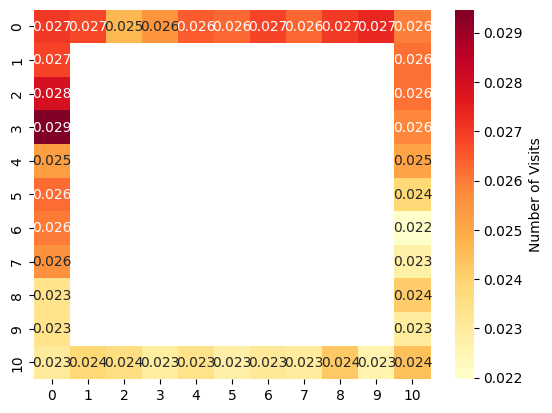

In [57]:
freq, plt = make_heatmap(positions)

In [38]:
monopoly_map[max(freq, key=lambda x: freq[x])]

('Illinois Avenue', 'red')

In [18]:
max(freq, key=lambda x: freq[x])

17